[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ee-ortiz/ISIS-4825_202320_IMAGENES_Y_VISION/blob/main/Laboratorio%203/Taller/MISIS4825-M%26V2023%20-%20TALLER3.ipynb)

![image](https://drive.google.com/u/0/uc?id=15DUc09hFGqR8qcpYiN1OajRNaASmiL6d&export=download)

# Laboratorio III - Imágenes y Visión (ML)

**Integrantes:**

* Juan Sebastián Pinzón Roncancio (201915773)

* David Santiago Ortiz Almanza (201913600)


_______________________________________________

En este taller, se exploraremos el uso de TensorFlow y Keras para el diseño y entrenamiento de redes neuronales perceptrón multicapa. Para ello utilizaremos el conjunto de datos **Alien vs. Predator**. El objetivo es construir un modelo de red neuronal que pueda clasificar correctamente las imágenes de acuerdo a su clase.

1\. **Preprocesamiento de Datos**

-   Implemente técnicas de preprocesamiento como normalización, estandarización y aumentación de datos utilizando TensorFlow y Keras.
-   Justifique cada técnica de preprocesamiento seleccionada y su impacto en el modelo de red neuronal.

2\. **Construcción de un Modelo de Red Neuronal Perceptrón Multicapa**

-   Desarrolle un modelo de red neuronal perceptrón multicapa utilizando Keras.
-   Discuta la elección de la arquitectura, incluyendo el número de capas, neuronas por capa, y funciones de activación.

3\. **Definición de Funciones de Callbacks para Monitorear el Entrenamiento**

-   Implemente funciones de callbacks en TensorFlow y Keras para monitorear el proceso de entrenamiento.
-   Explique cómo estas funciones pueden ayudar en la identificación de problemas como el sobreajuste o el entrenamiento insuficiente.
-   Justifique la selección de ciertos callbacks y su configuración.

4\. **Entrenamiento y Exploración de Resultados**

-   Detalle el proceso de entrenamiento, incluyendo la elección de la tasa de aprendizaje, el optimizador, y la función de pérdida.
-   Analice los resultados obtenidos, utilizando métricas de desempeño como precisión, recall, y F1-score.

Datos: [Alien vs. Predator images](https://www.kaggle.com/datasets/pmigdal/alien-vs-predator-images)

# Librerías

A continuación, se importan las librerías utilizadas para el desarrollo del Laboratorio III.

In [39]:
import os
import json
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from PIL import Image
from tensorflow import keras
from kaggle.api.kaggle_api_extended import KaggleApi
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

plt.style.use('seaborn-v0_8-colorblind')

# 1. **Exploración y previsualización de los datos.**

## Descarga y configuración del conjunto de datos.

A continuación, se realiza la configuración del conjunto de datos, lo cual incluye la definición de las credencias de Kaggle, las cuáles se utilizaran para descargar los datos correspondientes. Posteriormente, se definen las rutas de los directorios en los que quedarón almacenados los datos.

In [40]:
# Archivo'kaggle.json' debe contener las credenciales de la API de Kaggle
with open('kaggle.json') as f:
    kaggle_credentials = json.load(f)

# Configuración de las variables de entorno con las credenciales de Kaggle
os.environ['KAGGLE_USERNAME'] = kaggle_credentials['username']
os.environ['KAGGLE_KEY'] = kaggle_credentials['key']

# Autenticación y descarga del conjunto de datos de Alien vs. Predator
api = KaggleApi()
api.authenticate()
api.dataset_download_files('pmigdal/alien-vs-predator-images', path='data', unzip=True)

# Definición de directorio
data_train_directory = 'data/data/train'
data_validation_directory = 'data/data/validation'

## Muestreo de imagenes por clase

A continuación, se realizar una inspección visual de las imágenes presentes en el dataset. En concreto se revisan 5 imágenes por cada una de las clases presentes para entender el contenido del dataset.

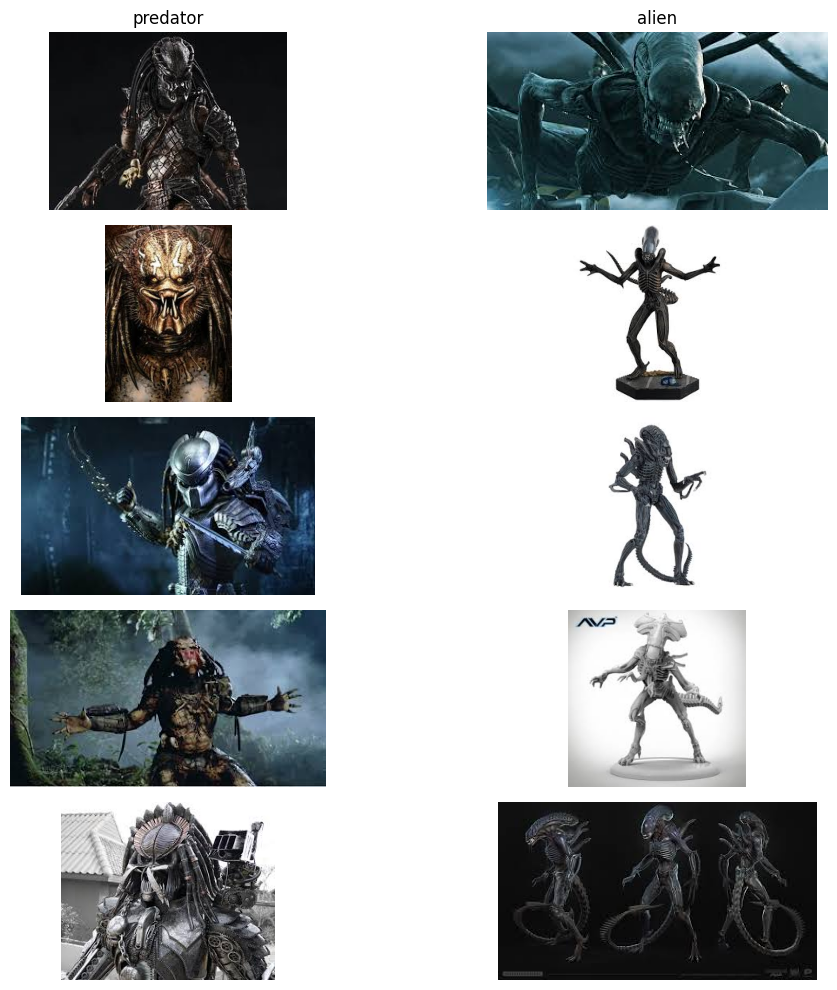

In [41]:
def show_sample_images(data_dir, num_samples=5):
    fig, axes = plt.subplots(nrows=num_samples, ncols=len(os.listdir(data_dir)), figsize=(12, 10))

    for i, class_dir in enumerate(os.listdir(data_dir)):
        class_path = os.path.join(data_dir, class_dir)
        if os.path.isdir(class_path):
            image_names = os.listdir(class_path)
            sample_images = image_names[:num_samples]

            for j, image_name in enumerate(sample_images):
                image_path = os.path.join(class_path, image_name)
                img = Image.open(image_path)
                axes[j, i].imshow(img)
                axes[j, i].axis('off')
                if j == 0:
                    axes[j, i].set_title(class_dir)

    plt.tight_layout()
    plt.show()

# Mostrar imágenes de muestra
show_sample_images(data_train_directory)

## Distribución de las imágenes por clase y dataset

Posteriormente, se realizó un diagrama de barras para poder visualizar la cantidad de muestras presentes por cada una de las clases en cada conjunto de datos.

Se puede observar que el conjunto de datos está completamente balanceado.

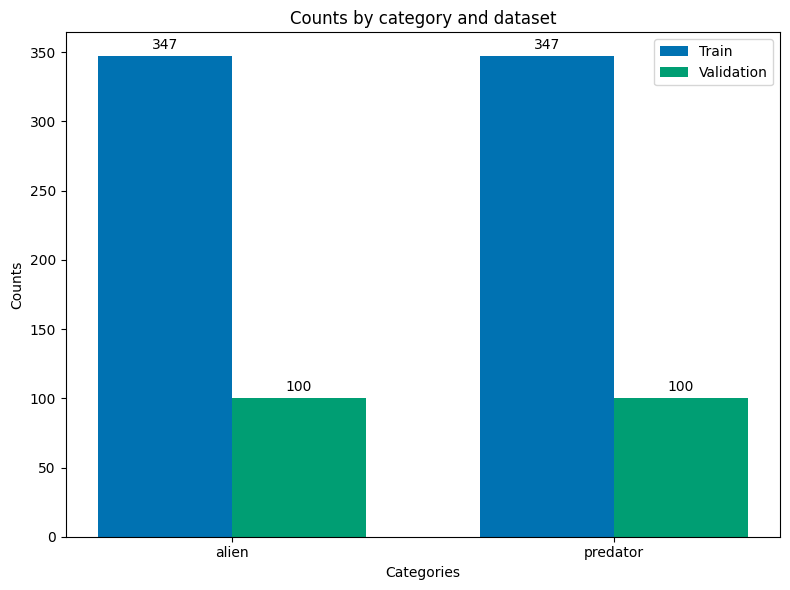

In [42]:
def count_images(data_dir):
    total_images = 0
    counts = {}

    for class_dir in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_dir)
        if os.path.isdir(class_path):
            num_images = len(os.listdir(class_path))
            total_images += num_images
            counts[class_dir] = num_images
            
    return counts

# Data for plotting
categories = ['alien', 'predator']
train_counts = list(count_images(data_train_directory).values())
validation_counts = list(count_images(data_validation_directory).values())

x = range(len(categories))

fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35

rects1 = ax.bar(x, train_counts, bar_width, label='Train')
rects2 = ax.bar([p + bar_width for p in x], validation_counts, bar_width, label='Validation')

ax.set_xlabel('Categories')
ax.set_ylabel('Counts')
ax.set_title('Counts by category and dataset')
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(categories)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

## Exploración de las dimensiones de las imágenes

A continuación, se procedió a realizar una inspección de la resolución de las imágenes presentes en el dataset. Esto es importante, puesto que, para entrenar un modelo de aprendizaje se requiere que todas las imágenes tengan las mismas dimensiones.

Como se puede ver, en el dataset existe una gran variedad de resoluciones, razón por la cuál se tendrá que cambiar el tamaño de estás a uno solo, se decidió utilizar el promedio de todas: 224 x 223 x 3.

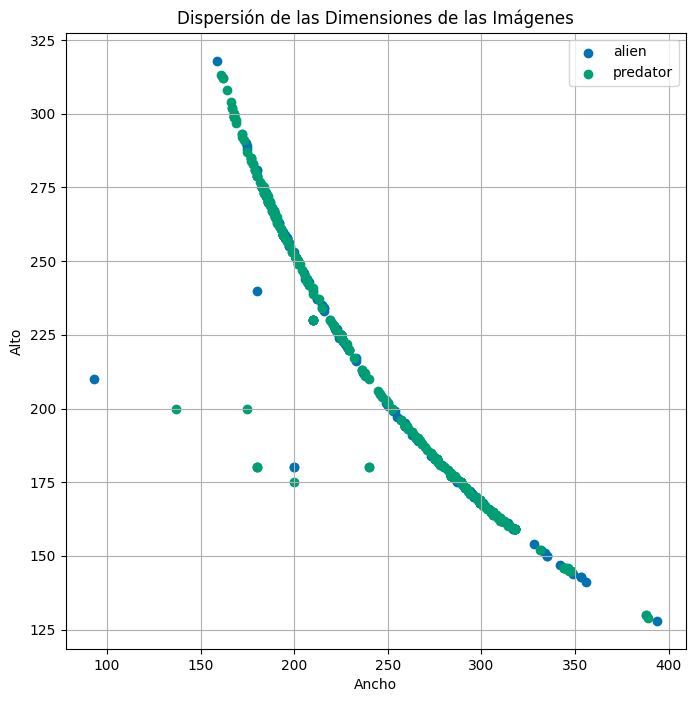

In [43]:
def plot_image_dimensions(data_dir):
    widths = []
    heights = []
    labels = []

    for class_dir in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_dir)
        if os.path.isdir(class_path):
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)
                with Image.open(image_path) as img:
                    w, h = img.size
                    widths.append(w)
                    heights.append(h)
                    labels.append(class_dir)

    plt.figure(figsize=(8, 8))
    for label in set(labels):
        idx = [i for i, x in enumerate(labels) if x == label]
        plt.scatter([widths[i] for i in idx], [heights[i] for i in idx], label=label)

    plt.title('Dispersión de las Dimensiones de las Imágenes')
    plt.xlabel('Ancho')
    plt.ylabel('Alto')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_image_dimensions(data_train_directory)

# 2. **Preprocesamiento de Datos**

## Creación de los DataFrames

Con el fin de facilitar el uso de cada uno de los conjuntos de los datos, se decidió crear un dataframe por cada uno de estos. Este tendrá una columna que índica la ruta de las imágenes y una columna qué índica a qué clase corresponde cada una de las imágenes. A continuación, se muestra un ejemplo del dataframe de entrenamiento y test.

In [44]:
def create_dataframe(directory):
    data = []
    categories = os.listdir(directory)
    for category in categories:
        category_path = os.path.join(directory, category)
        if os.path.isdir(category_path):
            images = os.listdir(category_path)
            for image in images:
                data.append({
                    'filepath': os.path.join(category_path, image),
                    'label': category
                })
    return pd.DataFrame(data)

# Crear DataFrames
train_df = create_dataframe(data_train_directory)
test_df = create_dataframe(data_validation_directory)

### Train Full Dataframe (Train + Validation)

In [45]:
train_df.head()

,filepath,label
0,data/data/train/predator/176.jpg,predator
1,data/data/train/predator/88.jpg,predator
2,data/data/train/predator/341.jpg,predator
3,data/data/train/predator/270.jpg,predator
4,data/data/train/predator/251.jpg,predator


### Test Dataframe

In [46]:
test_df.head()

,filepath,label
0,data/data/validation/predator/88.jpg,predator
1,data/data/validation/predator/84.jpg,predator
2,data/data/validation/predator/27.jpg,predator
3,data/data/validation/predator/20.jpg,predator
4,data/data/validation/predator/26.jpg,predator


## División de los datos de entrenamiento (Entrenamiento - Validación)

Además, se decidió dividir el conjunto de entrenamiento en 2 subconjuntos: Entrenamiento y validación. El primero se utilizará para encontrar parámetros del modelo y el segundo se utilizará cómo control para evitar el sobreajuste a los datos. 

Específicamente se tomó el 20% de los datos de entrenamiento como datos de validación. A continuación, se puede observar un ejemplo de estos.

In [47]:
# Dividir conjunto de entrenamiento en entrenamiento y validación
train_df, validation_df = train_test_split(train_df, test_size=0.2, random_state=42)

### Train Dataframe

In [48]:
train_df.head()

,filepath,label
110,data/data/train/predator/256.jpg,predator
82,data/data/train/predator/15.jpg,predator
51,data/data/train/predator/198.jpg,predator
218,data/data/train/predator/57.jpg,predator
623,data/data/train/alien/150.jpg,alien


### Validation Dataframe

In [49]:
validation_df.head()

,filepath,label
381,data/data/train/alien/307.jpg,alien
666,data/data/train/alien/206.jpg,alien
257,data/data/train/predator/49.jpg,predator
338,data/data/train/predator/225.jpg,predator
319,data/data/train/predator/206.jpg,predator


## Generador de imagenes y normalización


A continuación, se realiza la preparación de las imágenes. Incluye la configuración del tamaño de las imágenes a 224x224 píxeles y del tamaño de los lotes (batches) a 32. Además, se utilizó un ImageDataGenerator para aplicar varias transformaciones a las imágenes, como normalización, rotaciones, traslaciones, cizallamiento, zoom y volteo horizontal, lo que ayuda a mejorar la generalización del modelo a entrena. Finalmente, se crearon generadores de datos para los conjuntos de entrenamiento, prueba y validación. Estos pasos son esenciales para preparar las imágenes para el entrenamiento eficaz del modelo.

In [51]:
# Tamaños del resize de las imagenes
image_size = (224, 224)
batch_size = 32 # Tamaño del batch

# Generadores para el train, test y val
datagen = ImageDataGenerator(
    rescale=1./255,  # normalización
    rotation_range=40,  # rotaciones aleatorias
    width_shift_range=0.2,  # traslaciones horizontales
    height_shift_range=0.2,  # traslaciones verticales
    shear_range=0.2,  # aplicaciones de cizallamiento
    zoom_range=0.2,  # aplicaciones de zoom aleatorio
    horizontal_flip=True,  # horizontal flip activo
    fill_mode='nearest'  # Estrategia de relleno para puntos fuera de los límites
)

# Generadores de lectura de las imágenes de los directorios y de batches de datos
train_gen = datagen.flow_from_dataframe(
    train_df,
    x_col='filepath',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    featurewise_center=True,
    featurewise_std_normalization=True,
)

test_gen = datagen.flow_from_dataframe(
    test_df,
    x_col='filepath',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    shuffle=False,
    class_mode='binary' ,
    featurewise_center=True,
    featurewise_std_normalization=True,
)

val_gen = datagen.flow_from_dataframe(
    validation_df,
    x_col='filepath',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    shuffle=False,
    class_mode='binary',
    featurewise_center=True,
    featurewise_std_normalization=True,
)

Found 555 validated image filenames belonging to 2 classes.
Found 200 validated image filenames belonging to 2 classes.
Found 139 validated image filenames belonging to 2 classes.


### **Justificación del preprocesamiento**


1. **Normalización (rescale=1./255):**
    - Se normalizan los valores de los píxeles desde el rango de entrada de 0-255 a 0-1.  De esta forma es posible reducir (relativamente) la variabilidad en los datos y ayudará a su vez a la red neuronal a converger de forma más rápido en el entrenamiento. Lo anterior es graciias a que al reducir el rango de los datos de entrada, se puede hacer una reducción tambien en los rangos de variación de los pesos de las capas ocultas durante las actualizaciones del backpropagation. En otras palabras, reducir el reisgo de desvanecimiento de gradiente en las redes profundas.
    


2. **Estandarización ( parámetros de featurewise_center y featurewise_std_normalization):**
    - La estandarización nos permite ajustar la distribución de los píxeles para tener una media de cero y una desviación estándar de uno. Esto nos ayudará a mitigar la posible variación en terminos de escalas de los píxeles de nuestras imagenes. Puede ser util para el manejo de variaciones en las intensidades de nuestros datos de alien-predator, que al hacer el análisis exploratorio demostraron tener altas variaciones en terminos contrastes en las imagenes.
    
    


3. **Aumentación de Datos:**
    - Introduce variabilidad en el conjunto de entrenamiento sin necesidad de recopilar más datos. Al aplicar las transformaciones geométricas y otras modificaciones a las imágenes, se crea un conjunto de datos más robusto. En terminos del modelo, puede mejorar la capacidad para generalizar a imágenes nuevas y no vistas, por lo cual termina siendo un proceso fundamental. Los procesos de aumentación que se hicieron fueron los siguientes:

        - Rotaciones Aleatorias (rotation_range=40)

        - Traslaciones Horizontales (width_shift_range=0.2)

        - Traslaciones Verticales (height_shift_range=0.2)

        - Aplicaciones de Cizallamiento (shear_range=0.2)

        - Aplicaciones de Zoom Aleatorio (zoom_range=0.2)

        - Volteo Horizontal (horizontal_flip=True)

        - Estrategia de Relleno (fill_mode='nearest')

# 3\. **Construcción de un Modelo de Red Neuronal Perceptrón Multicapa**

In [52]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.regularizers import l2
from keras.metrics import binary_accuracy

# Definir el modelo
model = Sequential()

# Capa de flatten
model.add(Flatten(input_shape=image_size + (3,)))


# Segunda capa densa con una activación ReLU
model.add(Dense(768, activation='relu'))
model.add(Dropout(0.2)) # Dropout para la regularización


# Primera capa densa con una activación ReLU
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))  # Dropout para la regularización

# Capa de salida binaria
model.add(Dense(1, activation='sigmoid'))

# Now compile the model using the custom f1_score
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])
          
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_9 (Dense)             (None, 768)               115606272 
                                                                 
 dropout_6 (Dropout)         (None, 768)               0         
                                                                 
 dense_10 (Dense)            (None, 1024)              787456    
                                                                 
 dropout_7 (Dropout)         (None, 1024)              0         
                                                                 
 dense_11 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 116,394,753
Trainable params: 116,394,75

### Elección de la arquitectura:

- **Número de Capas y Neuronas:** Este modelo tiene dos capas ocultas. La primera capa oculta tiene 512 neuronas, y la segunda tiene 1024. Este número creciente de neuronas permite al modelo capturar más complejidad. Lo cual resulta de utilidad para modelos cuya entrada es de dimensiones grandes como en imágenes. Cabe resaltar que al tener un número grande de neuronas se podría correr con el riesgo al sobreajuste.

- **Funciones de Activación:** Se utiliza la función de activación ReLU ('relu') en las capas ocultas porque suele ser eficiente y efectiva para la mayoría de entrenamientos en gran variedad de tareas. Del mismo modo, proporciona la capacidad de modelar respuestas no lineales sin caer en los problemas del gradiente desvaneciente (debido a lo facil que es calcular su gradiente y activación). Para la capa de salida, se utiliza la función de activación con 'sigmoide' puesto que al tratarse de un clasificador binario la sigmoide permite diferenciar con un valor de probabilidad entre 0 y 1 la pertenencia a la clase positiva (que se decide mayor a 0.5).

- **Regularización (Dropout):** Se añade el Dropout después de las capas densas para evitar el sobreajuste. Se desactivan aleatoriamente el 0.5 de neuronas durante el entrenamiento, lo que ayuda a que el modelo sea menos sensible a los datos de entrenamiento muy especificos (es decir que no memorice) y que mejorela generalización.

- **Optimizador:** Se elige 'adam' como optimizador, que ajusta automáticamente la tasa de aprendizaje durante el entrenamiento y generalmente funciona bien en la práctica para los modelos de redes profundas.

- **Función de Pérdida:** Para la compilación del modelo se usa 'binary_crossentropy', normalmente es la que se usa para clasificación binaria, pues permite dicernir la perdida para etiquetas binarias de la forma (0,1).

# 4\. **Definición de Funciones de Callbacks para Monitorear el Entrenamiento**


In [53]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import TensorBoard


early_stopping = EarlyStopping(
    monitor='val_loss',  # Métrica a monitorizar
    patience=15,         # Número de épocas sin mejora tras las cuales se detendrá el entrenamiento
    verbose=1,           # Muestra mensajes cuando se detiene el entrenamiento
    restore_best_weights=True  # Restaura los pesos del modelo desde la época con el mejor valor de la métrica monitoreada.
)

model_checkpoint = ModelCheckpoint(
    'best_model.h5',  # Nombre del archivo donde se guardarán los pesos
    monitor='val_loss',  # Métrica a monitorizar
    save_best_only=True,  # Solo guarda cuando la métrica monitorizada mejore
    verbose=1            # Muestra mensajes cuando se guarda el modelo
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Métrica a monitorizar
    factor=0.1,          # Factor por el cual se multiplicará la tasa de aprendizaje
    patience=5,          # Número de épocas sin mejora tras las cuales se reducirá la tasa de aprendizaje
    verbose=1            # Muestra mensajes cuando se reduce la tasa de aprendizaje
)

tensorboard = TensorBoard(
    log_dir='./logs',  # Directorio donde se guardarán los logs
    histogram_freq=1,  # Frecuencia (en épocas) para calcular histogramas de activación
    write_graph=True,  # Si visualizar el grafo
    write_images=True, # Si visualizar imágenes de pesos
    update_freq='epoch' # Con qué frecuencia se escribirán los logs ('batch', 'epoch', o un número entero)
)


1\. **EarlyStopping:**
- Detiene el entrenamiento cuando una métrica monitoreada ha dejado de mejorar.
- *Utilidad:* Ayudar a prevenir el sobreajuste al detener el entrenamiento antes de que la métrica de validación deje de mejorar durante un número especificado de épocas (patience). De esta forma, se garantiza que el modelo no se quede con pesos que se han empezado a sobreajustar.

2.\. **ModelCheckpoint:**
- Guarda el modelo después de cada época.
- *Utilidad:* Permite conservar el mejor modelo observado durante el entrenamiento según una métrica de rendimiento, de esta forma se puede guardar el modelo que actúa mejor en el conjunto de validación.


3.\. **ReduceLROnPlateau:**
- Reduce la tasa de aprendizaje cuando una métrica ha dejado de mejorar.
- *Utilidad:* Ayuda a salir de los "plateau" durante el entrenamiento al reducir la tasa de aprendizaje, esto significa puntos en los que no hay cambios significativos de mejora en los entrenamientos. De esta forma se permite la posibilidad de una mejora continua en el rendimiento y metricas monitorizadas.

4.\. **TensorBoard:**
- Habilita la visualización del proceso de entrenamiento.
- *Utilidad:* Permite el seguimiento y la visualización del proceso de entrenamiento y el rendimiento del modelo en tiempo real con el fin de identificar problemas relacionados con sobreajuste, problemas con la actualización de los pesos en el backpropagation o el entrenamiento insuficiente.

# 5\. **Entrenamiento y Validación de Resultados**

## Entrenamiento del modelo construido junto a los callbacks

In [16]:
with tf.device('/device:GPU:0'): 
    history = model.fit(
        train_gen,
        steps_per_epoch=train_gen.n // batch_size,
        epochs=100,
        validation_data=val_gen,
        validation_steps=val_gen.n // batch_size,
        callbacks=[early_stopping, model_checkpoint, reduce_lr, tensorboard]
    )

Epoch 1/100


2023-11-20 14:07:06.221775: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-11-20 14:07:06.227257: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x55cabae9f5b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-20 14:07:06.227285: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA A40, Compute Capability 8.6
2023-11-20 14:07:06.227293: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (1): NVIDIA A40, Compute Capability 8.6
2023-11-20 14:07:06.227299: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (2): NVIDIA A40, Compute Capability 8.6
2023-11-20 14:07:06.227304: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (3): NVIDIA A40, Compute Capability 8.6
2023-11-20 14:07:06.235448: I tensorflow/compiler/mlir/t

17/17 [==============================] - ETA: 0s - loss: 762.7311 - binary_accuracy: 0.4952
Epoch 1: val_loss improved from inf to 7.56375, saving model to best_model.h5
17/17 [==============================] - 18s 962ms/step - loss: 762.7311 - binary_accuracy: 0.4952 - val_loss: 7.5638 - val_binary_accuracy: 0.5625 - lr: 0.0100
Epoch 2/100
17/17 [==============================] - ETA: 0s - loss: 3.2832 - binary_accuracy: 0.4952
Epoch 2: val_loss improved from 7.56375 to 1.42105, saving model to best_model.h5
17/17 [==============================] - 15s 900ms/step - loss: 3.2832 - binary_accuracy: 0.4952 - val_loss: 1.4211 - val_binary_accuracy: 0.5312 - lr: 0.0100
Epoch 3/100
17/17 [==============================] - ETA: 0s - loss: 1.2128 - binary_accuracy: 0.5048
Epoch 3: val_loss improved from 1.42105 to 0.87479, saving model to best_model.h5
17/17 [==============================] - 34s 2s/step - loss: 1.2128 - binary_accuracy: 0.5048 - val_loss: 0.8748 - val_binary_accuracy: 0.5938

## Revisión del proceso de entrenamiento (Training - Validation / Loss - Accuracy)

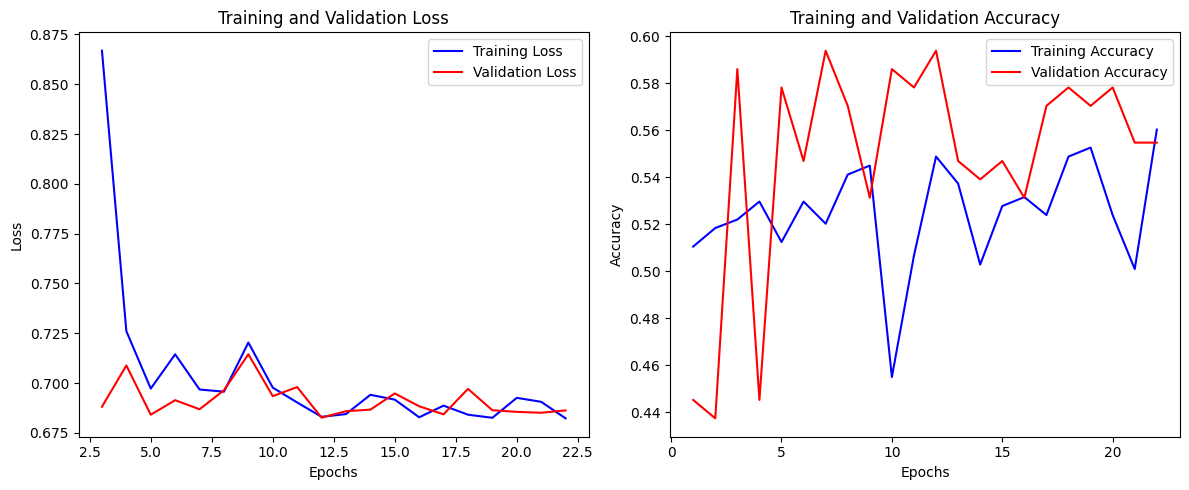

In [38]:
# Extracting data from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['binary_accuracy']
val_accuracy = history.history['val_binary_accuracy']
epochs = range(1, len(train_loss) + 1)

# Creating the plots
plt.figure(figsize=(12, 5))

# Plot for training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs[2:], train_loss[2:], 'b-', label='Training Loss')
plt.plot(epochs[2:], val_loss[2:], 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot for training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


## Evaluación del modelo en el conjunto test

In [17]:
predictions = model.predict(test_gen, steps=test_gen.n // batch_size+1)
predicted_classes = (predictions > 0.5).astype(int).flatten()
true_classes = test_gen.classes
class_labels = ['Negative', 'Positive']
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

7/7 [==============================] - 2s 246ms/step
['Negative', 'Positive']
              precision    recall  f1-score   support

    Negative       0.66      0.64      0.65       100
    Positive       0.65      0.67      0.66       100

    accuracy                           0.66       200
   macro avg       0.66      0.66      0.65       200
weighted avg       0.66      0.66      0.65       200



# 6. Análisis de resultados.

### **Gráficos de Pérdida (Loss) y Precisión (Accuracy)**:


* **Pérdida de Entrenamiento y Validación:**

En las primeras épocas, la pérdida de los datos de entrenamiento y validación disminuye a medida que aumentan las épocas, lo que indica que el modelo está aprendiendo de manera efectiva. Sin embargo, a medida que avanzan las épocas está se estabiliza, lo que índica que el aprendizaje cada vez es más lento.

* **Precisión de Entrenamiento y Validación:**

La precisión de entrenamiento y validación fluctúan un poco pero tienen una tendencia de crecimiento, lo que podría indicar que aunque el modelo está aprendiendo, no tiene un aprendizaje estable a través de las épocas. Además, ambas precisiones (entrenamiento y validación) están cercanas entre sí, lo cuál muestra que el modelo está generalizando bien y no se están cometiendo errores de sobreajuste.


### **Reporte de Clasificación:**

* **Precisión (Precision):**

La precisión para ambas clases, 'Negative' (alien) y 'Positive' (predator), es similar (0.66 y 0.65 respectivamente). Esto indica que el modelo tiene una probabilidad comparable de identificar correctamente cada clase.

* **Recall (Sensibilidad):**

El recall también es similar para ambas clases (0.64 para 'Negative' y 0.67 para 'Positive'). Esto sugiere que el modelo tiene una capacidad similar de encontrar todos los ejemplos relevantes de cada clase en el conjunto de datos.

* **Puntaje F1 (F1-Score):**

Los puntajes F1 de ambas clases son cercanos (0.65 para 'Negative' y 0.66 para 'Positive'), lo que sugiere un equilibrio entre la precisión y el recall. Aunque el F1 no es demasiado alto es suficientemente superior a 0.5 como para concluir que el modelo fue capaz de aprender a lo largo del proceso.